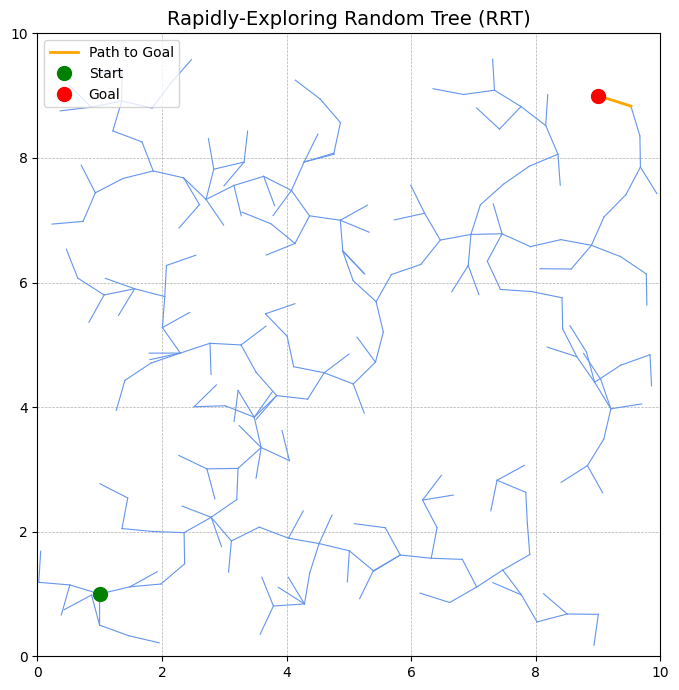

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Helper functions
def calculate_distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def random_point():
    return np.random.uniform(0, 10), np.random.uniform(0, 10)

start_point = (1, 1)
goal_point = (9, 9)
vertices = [start_point]
edges = []
goal_reached = False

# RRT exploration loop
for _ in range(500):
    random_sample = random_point()
    nearest_vertex = min(vertices, key=lambda n: calculate_distance(n, random_sample))
    direction = np.array(random_sample) - np.array(nearest_vertex)
    step_size = 0.5
    direction = direction / np.linalg.norm(direction)
    new_vertex = tuple(np.array(nearest_vertex) + step_size * direction)

    # Skip if outside boundary
    if not (0 <= new_vertex[0] <= 10 and 0 <= new_vertex[1] <= 10):
        continue

    vertices.append(new_vertex)
    edges.append((nearest_vertex, new_vertex))

    if calculate_distance(new_vertex, goal_point) < 0.7:
        edges.append((new_vertex, goal_point))
        goal_reached = True
        break

# Visualization
fig, ax = plt.subplots(figsize=(7, 7))
for (v1, v2) in edges:
    ax.plot([v1[0], v2[0]], [v1[1], v2[1]], 'cornflowerblue', linewidth=0.8)

# Highlight the final edge to goal
if goal_reached:
    ax.plot([new_vertex[0], goal_point[0]], [new_vertex[1], goal_point[1]],
            'orange', linewidth=2, label='Path to Goal')

# Markers for start and goal
ax.plot(start_point[0], start_point[1], 'go', markersize=10, label='Start')
ax.plot(goal_point[0], goal_point[1], 'ro', markersize=10, label='Goal')

# Formatting
ax.set_title("Rapidly-Exploring Random Tree (RRT)", fontsize=14)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()